<a href="https://colab.research.google.com/github/lucasprogty/probabilidades/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
le = LabelEncoder()
scaler = MinMaxScaler()
pca = PCA()

df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


#primeiramente vamos remover todos os valores nulos


df = df.dropna()


In [ ]:
#vamos transformar a coluna de data no tipo certo
df['Date'] = pd.to_datetime(df['ORDERDATE'])

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'Date'],
      dtype='object')

In [ ]:
#vamos selecionar as colunas que vamos trabalhar para que fique possamos direcionar nossa analise
data = df[['QUANTITYORDERED','SALES', 'PRODUCTLINE', 'CITY', 'STATE', 'DEALSIZE', 'Date']]

In [ ]:
data.shape

(147, 7)

In [ ]:
#vamos transformar as variaveis categoricas em valores numericos
data = pd.get_dummies(data, columns=['PRODUCTLINE', 'CITY', 'STATE'], drop_first=True)
data = pd.get_dummies(data, columns=['DEALSIZE'], drop_first=True)
data.head()


,QUANTITYORDERED,SALES,Date,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,CITY_Melbourne,CITY_North Sydney,STATE_Victoria,DEALSIZE_Medium,DEALSIZE_Small
10,37,3965.66,2004-02-20,True,False,False,False,False,True,False,True,True,False
21,20,1451.00,2004-12-17,True,False,False,False,False,False,False,False,False,True
40,21,4905.39,2004-07-19,False,False,False,False,False,False,False,False,True,False
47,30,3944.70,2004-11-29,False,False,False,False,False,True,False,True,True,False
51,24,2416.56,2005-03-09,False,False,False,False,False,False,True,False,False,True


In [ ]:
#agora vamos normalizar os valores de sales e quantity
data['SALES'] = scaler.fit_transform(data[['SALES']])
data['QUANTITYORDERED'] = scaler.fit_transform(data[['QUANTITYORDERED']])

Text(0.5, 1.0, 'mapa de correlacao')

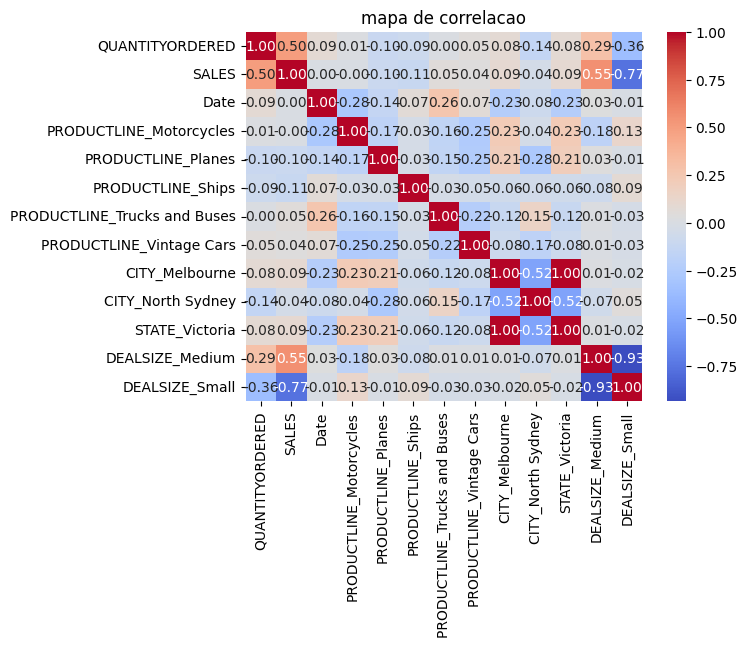

In [ ]:
#depois que os dados estao normalizados vamo usar a correlaçao para entender nossos dados
correlacao = data.corr()
correlacao
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('mapa de correlacao')

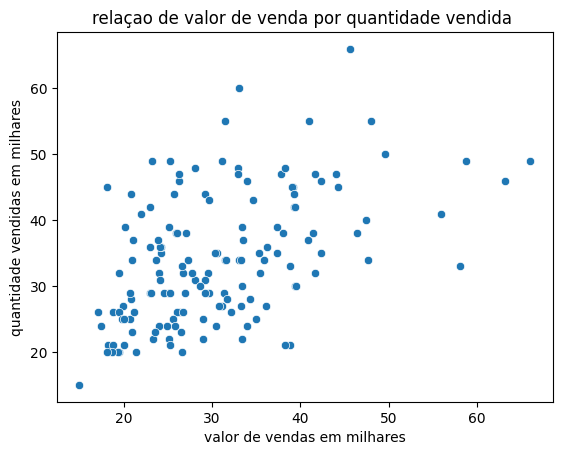

In [ ]:
#vamos demostrar a de quantidade vendida por tipo de negocio
#voltando o valor de sales e quantidade
sales = scaler.inverse_transform(data[['SALES']]).flatten()
quantity = scaler.inverse_transform(data[['QUANTITYORDERED']]).flatten()


sns.scatterplot(data, x=sales, y=quantity)
plt.title('relaçao de valor de venda por quantidade vendida ')
plt.xlabel('valor de vendas em milhares')
plt.ylabel('quantidade vendidas em milhares')
plt.show()






In [ ]:
#depois de identificar a correlaço entre nossas variaveis vamos trazer algumas analises descritivas:
media_sales = scaler.inverse_transform(data[['SALES']]).mean()
mediana_sales = np.median(scaler.inverse_transform(data[['SALES']]))
media_quantity = scaler.inverse_transform(data[['QUANTITYORDERED']]).mean()
mediana_quantity = np.median(scaler.inverse_transform(data[['QUANTITYORDERED']]))
desvio_sales = scaler.inverse_transform(data[['SALES']]).std()
desvio_quantity = scaler.inverse_transform(data[['QUANTITYORDERED']]).std()

print(f'''   a media de venda e: {media_sales}\n
           a mediana de venda e: {mediana_sales}\n
           a media de quantidade vendida e: {media_quantity}\n
           a mediana de quantidade vendida e: {mediana_quantity}\n
           o desvio padrao de vendas e: {desvio_sales}\n
           o desvio padrao de quantidades vendidas e: {desvio_quantity}''')

   a media de venda e: 30.619527368660524

           a mediana de venda e: 29.024597442576372

           a media de quantidade vendida e: 33.98639455782313

           a mediana de quantidade vendida e: 33.0

           o desvio padrao de vendas e: 9.572677788043856

           o desvio padrao de quantidades vendidas e: 9.707270852765468


In [ ]:
#agora vamos aplicar conceitos de algebra linear para entender as componentes que explicam as variancias nos dados:
matriz_variaveis = data[['SALES', 'QUANTITYORDERED']]
pca.fit(matriz_variaveis)
matriz_pca = pca.transform(matriz_variaveis)

variancia_explicada = pca.explained_variance_ratio_
variancia_acumulada = np.cumsum(variancia_explicada)

print('variancia explicada por componente:', variancia_explicada)
print('variancia acumulada ', variancia_acumulada)



variancia explicada por componente: [0.74842013 0.25157987]
variancia acumulada  [0.74842013 1.        ]


In [ ]:
#podemos afirmar que as variaveis sales e quantity ordered influenciam diretatemente nos nossos valores

In [ ]:

data.columns



Index(['QUANTITYORDERED', 'SALES', 'Date', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'CITY_Melbourne', 'CITY_North Sydney', 'STATE_Victoria', 'DEALSIZE_Medium',
       'DEALSIZE_Small'],
      dtype='object')

In [ ]:
#vamos calcular a probabilidade de ter um negocio de baixo impacto, DEALDSIZE_small

x_north_sydney = data[data['CITY_North Sydney'] == 1][['CITY_North Sydney', 'CITY_Melbourne']]
y_north_sydney = data[data['CITY_North Sydney'] == 1]['DEALSIZE_Small']

#prevendo a probabilidade de um dealSize_small para north sydney

modelo = LogisticRegression()
modelo.fit(x_north_sydney, y_north_sydney)
prob_north_sydney = modelo.predict_proba(x_north_sydney)
print('a probabilidade de um negocio pequeno em North Sydney e:', prob_north_sydney[:, 1].mean())


a probabilidade de um negocio pequeno em North Sydney e: 0.5218004160274049


In [ ]:
#agora vamos calcula a probabilidade de ter um negocio de baixo impacto em melbourne
x_melbourne = data[data['CITY_Melbourne'] == 1][['CITY_Melbourne', 'CITY_North Sydney']]
y_melbourne = data[data['CITY_Melbourne'] == 1]['DEALSIZE_Small']

#prevendo a probabilidade de um dealSize_Small para melbourne
modelo = LogisticRegression()
modelo.fit(x_melbourne, y_melbourne)
prob_melbourne = modelo.predict_proba(x_melbourne)
print('a probabilidade de um negocio pequeno em Melbourne e:', prob_melbourne[:, 1].mean())

a probabilidade de um negocio pequeno em Melbourne e: 0.4727188313968014


In [ ]:
data.columns

Index(['QUANTITYORDERED', 'SALES', 'Date', 'DEALSIZE_Medium', 'DEALSIZE_Small',
       'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes', 'PRODUCTLINE_Ships',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars', 'CITY_Melbourne',
       'CITY_North Sydney', 'STATE_Victoria'],
      dtype='object')

a probabilidade de vender motocicletas em north sydney e: 12.05%
a probabilidade de vender carros vintage em north sydney e: 17.65%
a probabilidade de vender onibus e caminhoes em north sydney e: 18.34%
a probabilidade de vender avioes em north sydney e: 3.47%
a probabilidade de vender embarcaçoes em north sydney e: 0.63%


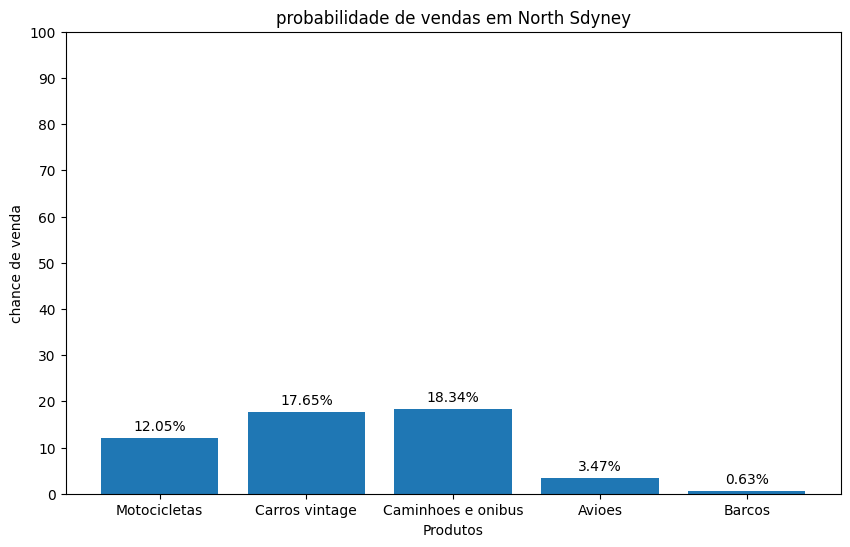

In [ ]:
#agora vamos fazer a probabilidade de  vendas de motocicletas, carros vintage e onibus e caminhoes para north_sydney
dados_north_sydney = pd.DataFrame({
    'CITY_North Sydney': [True],
    'CITY_Melbourne': [False]
    })
x_cities = data[['CITY_North Sydney', 'CITY_Melbourne']]
modelo = LogisticRegression()


#vendas de motocicletas
y_motorcyle = data['PRODUCTLINE_Motorcycles']
modelo.fit(x_cities, y_motorcyle)
prob_nortSydney_motorcycles = modelo.predict_proba(dados_north_sydney)[0][1]
print(f'a probabilidade de vender motocicletas em north sydney e: {prob_nortSydney_motorcycles:.2%}')

#vendas de carros vintage

y_vintageCars = data['PRODUCTLINE_Vintage Cars']
modelo.fit(x_cities, y_vintageCars)
prob_northSydney_vintageCars = modelo.predict_proba(dados_north_sydney)[0][1]
print(f'a probabilidade de vender carros vintage em north sydney e: {prob_northSydney_vintageCars:.2%}')

#vendas de caminhoes e onibus

y_trucks_buses = data['PRODUCTLINE_Trucks and Buses']
modelo.fit(x_cities, y_trucks_buses)
prob_northSydney_trucksBuses = modelo.predict_proba(dados_north_sydney)[0][1]
print(f'a probabilidade de vender onibus e caminhoes em north sydney e: {prob_northSydney_trucksBuses:.2%}')

#vendas de avioes
y_Planes = data['PRODUCTLINE_Planes']
modelo.fit(x_cities, y_Planes)
prob_northSydney_Planes = modelo.predict_proba(dados_north_sydney)[0][1]
print(f'a probabilidade de vender avioes em north sydney e: {prob_northSydney_Planes:.2%}')

#vendas de barcos
y_ships = data['PRODUCTLINE_Ships']
modelo.fit(x_cities, y_ships)
prob_northSydney_ships = modelo.predict_proba(dados_north_sydney)[0][1]
print(f'a probabilidade de vender embarcaçoes em north sydney e: {prob_northSydney_ships:.2%}')


#agora vamos montar um grafico para demonstar esse valores:

#fazendo um dicionario para plotar

probabilidades_northSydney = {
    'Motocicletas': prob_nortSydney_motorcycles,
    'Carros vintage': prob_northSydney_vintageCars,
    'Caminhoes e onibus': prob_northSydney_trucksBuses,
    'Avioes': prob_northSydney_Planes,
    'Barcos': prob_northSydney_ships
}

#transformando as chaves e valores do dicionario em variaveis para o nosso grafico
categorias = list(probabilidades_northSydney.keys())
valores = list(probabilidades_northSydney.values())
valores_porcentagem = [v * 100 for v in valores]

plt.figure(figsize=(10,6))
plt.bar(categorias, valores_porcentagem)

#colocando a probabilidade em cima das barras para melhor visualizacao
for i, valor in enumerate(valores_porcentagem):
  plt.text(i, valor + 1, f'{valor:.2f}%', ha='center', va='bottom')

plt.title('probabilidade de vendas em North Sdyney')
plt.xlabel('Produtos')
plt.ylabel('chance de venda')
plt.yticks(range(0, 101, 10))
plt.show()


a probabilidade de vender motocicletas em melbourne e: 23.20%
a probabilidade de vender carros vintage em melbourne e: 23.20%
a probabilidade de  vender caminhoes e onibus em melbourne e: 7.97%
a probabilidade de vender avioes em melbourne e: 22.71%
a probabilidade de vender avioes em melbourne e: 0.60%


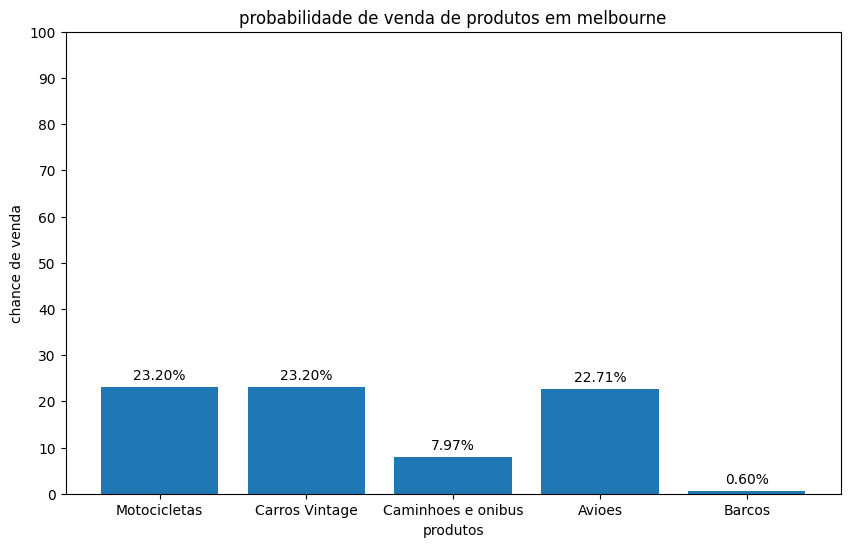

In [ ]:
#agora vamos realizar os mesmos calculos para melbourne

dados_melbourne = pd.DataFrame({
    'CITY_North Sydney': [False],
    'CITY_Melbourne': [True]
    })
x_cities = data[['CITY_North Sydney', 'CITY_Melbourne']]
modelo = LogisticRegression()

#probabilidade de vender moto em melbourne
y_motorcyle = data['PRODUCTLINE_Motorcycles']
modelo.fit(x_cities, y_motorcyle)
prob_melbourne_motorcycles = modelo.predict_proba(dados_melbourne)[0][1]
print(f'a probabilidade de vender motocicletas em melbourne e: {prob_melbourne_motorcycles:.2%}')

#probabilidade de vender carros vintage em melbourne
y_vintageCArs = data['PRODUCTLINE_Vintage Cars']
modelo.fit(x_cities, y_vintageCars)
prob_melbourne_vintageCars = modelo.predict_proba(dados_melbourne)[0][1]
print(f'a probabilidade de vender carros vintage em melbourne e: {prob_melbourne_vintageCars:.2%}')

#probabilidade de vender caminhoes e onibus em melbourne
y_truckBuses = data['PRODUCTLINE_Trucks and Buses']
modelo.fit(x_cities, y_truckBuses)
prob_melbourne_truckBuses = modelo.predict_proba(dados_melbourne)[0][1]
print(f'a probabilidade de  vender caminhoes e onibus em melbourne e: {prob_melbourne_truckBuses:.2%}')

#probabilidade de vender avioes em melbourne

y_Planes = data['PRODUCTLINE_Planes']
modelo.fit(x_cities, y_Planes)
prob_melbourne_Planes = modelo.predict_proba(dados_melbourne)[0][1]
print(f'a probabilidade de vender avioes em melbourne e: {prob_melbourne_Planes:.2%}')

#probabilidade de vender barcos em melbourne

y_Ships = data['PRODUCTLINE_Ships']
modelo.fit(x_cities, y_Ships)
prob_melbourne_Ships = modelo.predict_proba(dados_melbourne)[0][1]
print(f'a probabilidade de vender avioes em melbourne e: {prob_melbourne_Ships:.2%}')

#agora vamos fazer um grafico para interpretar melhor nossas probabilidades

probabilidades = {
    'Motocicletas': prob_melbourne_motorcycles,
    'Carros Vintage': prob_melbourne_vintageCars,
    'Caminhoes e onibus': prob_melbourne_truckBuses,
    'Avioes': prob_melbourne_Planes,
    'Barcos': prob_melbourne_Ships
}

#preparando nossas categorias para o grafico
categorias = list(probabilidades.keys())
valores = list(probabilidades.values())
valores_porcentagem = [v * 100 for v in valores]

plt.figure(figsize=(10, 6))
plt.bar(categorias, valores_porcentagem)

#colocando a probabilidade em cima das barras para melhor visualizacao
for i, valor in enumerate(valores_porcentagem):
  plt.text(i, valor + 1, f'{valor:.2f}%', ha='center', va='bottom')

plt.title('probabilidade de venda de produtos em melbourne')
plt.xlabel('produtos')
plt.ylabel('chance de venda')
plt.yticks(range(0, 101, 10))
plt.show()